In [153]:
import keras 
from keras import layers

In [154]:
encoding_dim = 60
input_geo = keras.Input(shape=(122,))
encoded = layers.Dense(encoding_dim, activation='leaky_relu')(input_geo)
decoded = layers.Dense(122, activation='leaky_relu')(encoded)

In [155]:
autoEncoder = keras.Model(input_geo, decoded)

encoder = keras.Model(input_geo, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoEncoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [156]:
autoEncoder.compile(optimizer='adam', loss='mean_squared_error')

In [157]:
import pandas as pd
import numpy as np

In [158]:
data = pd.read_csv('Geom(1).csv')
data.head

<bound method NDFrame.head of           .1  Unnamed: 2  ...  Unnamed: 119  Unnamed: 120  Unnamed: 121
0    82    0    81.55081  ...     -8.571701            82     -0.000381
1    82    0    81.55078  ...     -8.571686            82     -0.000366
2   129    0   128.29330  ...    -13.484740           129     -0.000595
3   108    0   107.40840  ...    -11.289550           108     -0.000504
4   145    0   144.20570  ...    -15.157260           145     -0.000671
5    89    0    88.51245  ...     -9.303406            89     -0.000427
6    83    0    82.54532  ...     -8.676208            83     -0.000366
7   133    0   132.27140  ...    -13.902860           133     -0.000610
8   116    0   115.36450  ...    -12.125820           116     -0.000534
9    79    0    78.56723  ...     -8.258099            79     -0.000366
10  131    0   130.28230  ...    -13.693790           131     -0.000610
11   89    0    88.51245  ...     -9.303436            89     -0.000397
12   85    0    84.53442  ...     

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
x_train, x_test = train_test_split(data, train_size=0.8, shuffle=False)
print(x_train.shape, x_test.shape)
#print (x_train)

(17, 122) (5, 122)


In [163]:
autoEncoder.fit(x_train, x_train,
                epochs=200,
                batch_size=5,
                shuffle=False)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 1.9129
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3756
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9782
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 0.6480
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.4193
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2697
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1640
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.1008
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0629
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 0.0408
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0250
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0166
Epoch 13/200
4/4 [==============================] - 0s 7ms/st

In [165]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: ignored

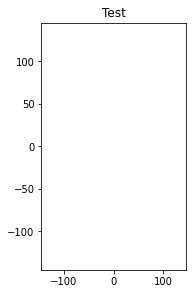

In [184]:
import matplotlib.pyplot as plt

n = 5  # How many digits we will display
plt.figure(figsize=(15, 10))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.xlim(-data.max().max(), data.max().max())
    plt.ylim(-data.max().max(), data.max().max())
    x_test_X, x_test_Y = x_test[i][::2], x_test[i][1::2] 
    #To be edited (x_test_X, x_test_Y -> any variables names) (x_test -> x_test's name on your code)
    plt.title("Test")
    plt.scatter(x_test_X, x_test_Y) 
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.xlim(-data.max().max(), data.max().max())
    plt.ylim(-data.max().max(), data.max().max())
    decoded_imgs_X, decoded_imgs_Y = decoded_imgs[i][::2], decoded_imgs[i][1::2]
    #To be edited (decoded_imgs_X, decoded_imgs_Y -> any variables names) (decoded_imgs -> decoded_imgs's name on your code)
    plt.title("Decoded")
    plt.scatter(decoded_imgs_X, decoded_imgs_Y, color = "red") 
plt.show()